In [15]:
# read the last's epoch result from the out.txt.
def find_f1_scores(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()

    f1_scores = []
    for i in range(len(lines)):
        if "INFO Validation loss" in lines[i]:
            # Search backwards from the current line for the F1_score line
            for j in range(i, 0, -1):
                if "F1_score Weighted" in lines[j]:
                    f1_score = lines[j].strip()
                    f1_scores.append(f1_score)
                    break

    return f1_scores

# change the directory to yours
f1_scores = find_f1_scores('/data/scratch/public/mlrsnet/output/out2.txt')
f1_scores2 = find_f1_scores('/data/scratch/public/mlrsnet/output/out3.txt')
f1_scores3 = find_f1_scores('/data/scratch/public/mlrsnet/output/out4.txt')

In [16]:
import numpy as np

# get the weighted f1
def extract_weighted_f1_scores(f1_scores):
    weighted_f1_scores = []
    for score in f1_scores:
        # Extract the F1_score Weighted value
        parts = score.split(',')
        for part in parts:
            if "F1_score Weighted" in part:
                weighted_score = part.split(':')[-1].strip()
                weighted_f1_scores.append(float(weighted_score))
                break
    return weighted_f1_scores

weighted_f1_scores = np.array(extract_weighted_f1_scores(f1_scores))
weighted_f1_scores2 = np.array(extract_weighted_f1_scores(f1_scores2))
weighted_f1_scores3 = np.array(extract_weighted_f1_scores(f1_scores3))

In [13]:
import matplotlib.pyplot as plt

In [58]:
# creathe the datasize which is our x-axis
datasize=[]
train_len = 500  
while train_len < 65000:  
    datasize.append(train_len)
    if train_len < 2000:
        train_len += 1000
    elif train_len < 6000: 
        train_len +=2000
    else:
        train_len += 4000

In [55]:
# calculate the mean and std
total_res = np.stack((weighted_f1_scores, weighted_f1_scores2, weighted_f1_scores3), axis=0)
mean_res = np.mean(total_res, axis=0)
std_res = np.std(total_res, axis=0)

Text(0.5, 1.0, 'Data Size Influence On Model Performance')

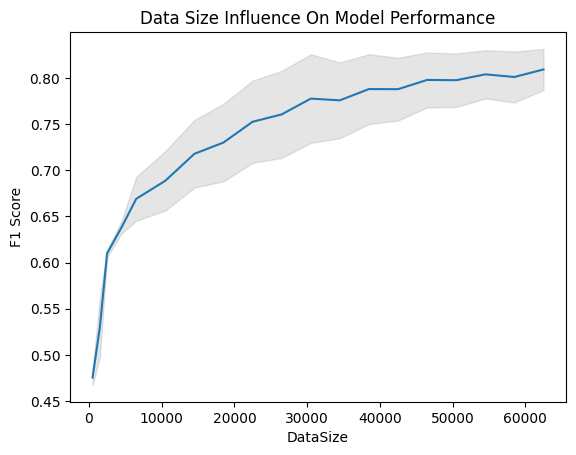

In [41]:
# plot the graph
upper_bound = mean_res + std_res
lower_bound = mean_res - std_res
plt.plot(datasize,mean_res)
plt.fill_between(datasize, lower_bound, upper_bound, color='gray', alpha=0.2)
plt.xlabel("DataSize")
plt.ylabel("F1 Score")
plt.title("Data Size Influence On Model Performance")

In [53]:
np.log10(datasize)

array([2.69897   , 3.17609126, 3.39794001, 3.65321251, 3.81291336,
       4.0211893 , 4.161368  , 4.26717173, 4.35218252, 4.42324587,
       4.48429984, 4.5378191 , 4.58546073, 4.62838893, 4.66745295,
       4.70329138, 4.7363965 , 4.76715587, 4.79588002])

Text(0.5, 1.0, 'Data Size Influence On Model Performance')

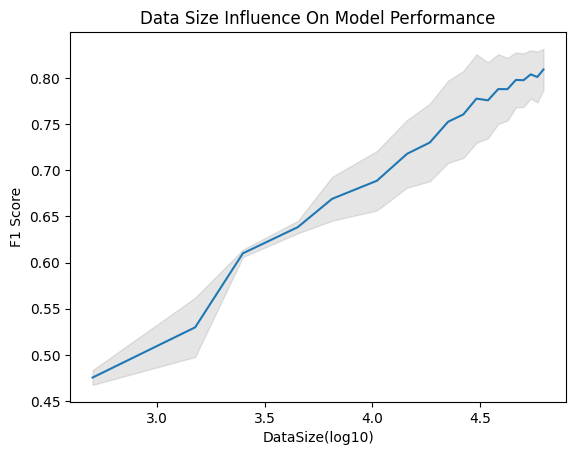

In [42]:
# plot the data size influence
# the data size influence is defined as the increase of data size / the increase of model performance 
upper_bound = mean_res + std_res
lower_bound = mean_res - std_res
plt.plot(np.log10(datasize),mean_res)
plt.fill_between(np.log10(datasize), lower_bound, upper_bound, color='gray', alpha=0.2)
plt.xlabel("DataSize(log10)")
plt.ylabel("F1 Score")
plt.title("Data Size Influence On Model Performance")

Text(0.5, 1.0, 'Data Efficency vs Data Size')

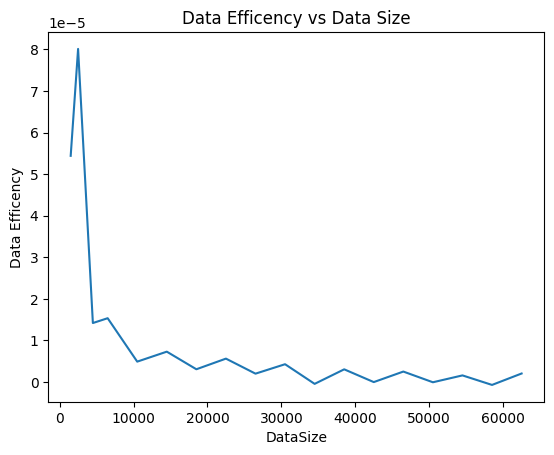

In [49]:
# plot the data efficency
# data efficency is defined as the increase of data size / the increase of model performance
plt.plot(datasize[1:],np.diff(mean_res)/np.diff(datasize))
plt.xlabel("DataSize")
plt.ylabel("Data Efficency")
plt.title("Data Efficency vs Data Size")